## The N-Body Problem

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Results

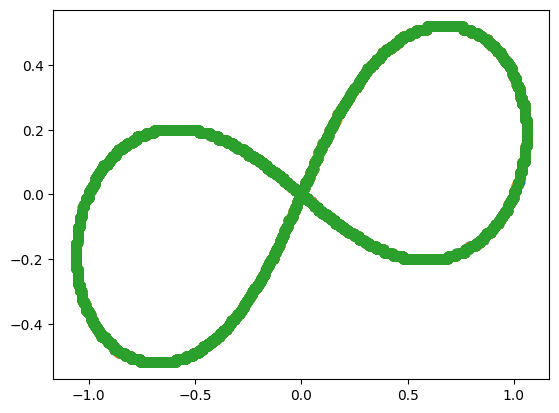

In [13]:
d = 2
k = 10000
n = 3

for b in range(1, n+1):
    body = pd.read_csv(f'output/FEinits2_body{b}.csv', header=None).to_numpy().reshape(k, d)
    plt.scatter(body[:, 0], body[:, 1]) 

plt.show()
